In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [130]:
df1=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
df3=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv') 
df4=pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df5=pd.read_csv('untitled11.txt')

In [108]:
df2='Total crimes against women'
df3='Total crimes against children'
df4='Total crimes against SCs'

In [99]:
df=pd.concat([df1,df2,df3,df4],axis=1)

In [8]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 9018 Rows and 71 Columns in our dataframe


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1,3,0,0,0,0,3,12,63,7


In [9]:
# Using the info technique to check columns for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 71 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

In [10]:
## examining any absent values
df.isna().sum()

STATE/UT                                1
DISTRICT                                1
YEAR                                    1
MURDER                                  1
ATTEMPT TO MURDER                       1
                                       ..
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
Length: 71, dtype: int64

In [11]:
df = df.dropna()
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9011,DELHI UT,WEST,2012.0,52.0,37.0,10.0,79.0,0.0,79.0,454.0,...,0,0,0,0,0,0,0,2,0,0
9012,LAKSHADWEEP,LAKSHADWEEP,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,38,0,6
9013,LAKSHADWEEP,TOTAL,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## obtaining the 'TOTAL' rows' index values
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [14]:
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [15]:
print(list(np.where(df1["DISTRICT"]=='DELHI UT TOTAL')))

[array([ 700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997], dtype=int64)]


In [16]:
df.drop([  700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997,28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3305, 3315, 3323, 3332,
       3343, 3378, 3403, 3437, 3442, 3480, 3485, 3557, 3571, 3597, 3600,
       3602, 3604, 3607, 3622, 3624, 3654, 3670, 3701, 3746, 3768, 3771,
       3802, 3825, 3839, 3864, 3889, 3921, 3941, 3993, 4039, 4049, 4057,
       4066, 4077, 4112, 4138, 4177, 4182, 4220, 4225, 4297, 4311, 4336,
       4339, 4341, 4343, 4346, 4361, 4364, 4394, 4410, 4441, 4486, 4508,
       4511, 4542, 4565, 4579, 4604, 4631, 4663, 4683, 4735, 4781, 4791,
       4799, 4808, 4820, 4855, 4881, 4920, 4925, 4963, 4968, 5040, 5054,
       5079, 5081, 5083, 5085, 5088, 5104, 5107, 5137, 5153, 5184, 5229,
       5251, 5254, 5286, 5309, 5323, 5351, 5378, 5412, 5431, 5485, 5531,
       5542, 5550, 5559, 5571, 5608, 5634, 5674, 5679, 5718, 5723, 5796,
       5810, 5835, 5838, 5840, 5842, 5845, 5865, 5868, 5898, 5915, 5946,
       5991, 6013, 6016, 6048, 6071, 6087, 6116, 6143, 6177, 6196, 6250,
       6296, 6307, 6315, 6324, 6336, 6373, 6399, 6439, 6444, 6485, 6490,
       6563, 6577, 6602, 6605, 6607, 6609, 6612, 6632, 6635, 6669, 6687,
       6718, 6763, 6785, 6788, 6821, 6844, 6860, 6890, 6917, 6952, 6971,
       7025, 7071, 7082, 7090, 7099, 7111, 7148, 7175, 7216, 7221, 7262,
       7268, 7342, 7356, 7381, 7384, 7386, 7388, 7391, 7411, 7414, 7448,
       7466, 7497, 7542, 7565, 7568, 7603, 7626, 7642, 7672, 7699, 7735,
       7756, 7810, 7856, 7867, 7875, 7884, 7896, 7933, 7962, 8004, 8009,
       8049, 8055, 8132, 8146, 8172, 8175, 8177, 8179, 8182, 8202, 8205,
       8239, 8257, 8290, 8335, 8364, 8367, 8402, 8426, 8442, 8473, 8500,
       8536, 8557, 8611, 8657, 8668, 8676, 8685, 8697, 8734, 8763, 8806,
       8811, 8851, 8861, 8938, 8952, 8982, 8986, 8988, 8990, 8993, 9013], axis=0, inplace=True)

In [17]:
df.reset_index(drop = True)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,DELHI UT,SOUTH-WEST,2012.0,47.0,48.0,6.0,87.0,0.0,87.0,399.0,...,0,0,0,0,0,0,0,9,0,1
8581,DELHI UT,STF,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8582,DELHI UT,WEST,2012.0,52.0,37.0,10.0,79.0,0.0,79.0,454.0,...,0,0,0,0,0,0,0,2,0,0
8583,LAKSHADWEEP,LAKSHADWEEP,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,38,0,6


In [18]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 8585 Rows and 71 Columns in our dataframe


In [19]:
df.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],axis=1, inplace=True)

In [20]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 8585 Rows and 66 Columns in our dataframe


In [21]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,...,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000
mean,2006.627839,46.834013,40.964356,5.193477,27.774956,0.003029,27.771928,41.393710,10.817006,6.904135,...,1.482236,3.028305,0.931159,0.076529,0.172860,0.490973,9.158649,23.394409,0.640536,30.510076
std,3.460669,42.767546,50.613184,9.953583,30.825496,0.079257,30.821502,55.779954,21.331580,10.942769,...,9.391068,15.743377,7.510092,0.628123,1.034554,2.556618,41.699198,126.140253,5.076290,175.557007
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,37.000000,27.000000,2.000000,19.000000,0.000000,19.000000,24.000000,5.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
75%,2010.000000,63.000000,54.000000,5.000000,39.000000,0.000000,39.000000,52.000000,12.000000,9.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,15.000000,0.000000,19.000000
max,2012.000000,542.000000,741.000000,241.000000,568.000000,5.000000,568.000000,587.000000,484.000000,219.000000,...,323.000000,397.000000,363.000000,22.000000,24.000000,66.000000,900.000000,4436.000000,153.000000,4536.000000


Observations

.With a minimum value of 0 and a maximum value of 542 for the murder column, a few districts ought to have this count as its maximum murder value.
.ATTEMPT TO MURDER has a maximum value of 741. In contrast, the RAPE column has a maximum value of 568. We can also check the other columns.
.Total crimes against women have a minimum value of 0 and a maximum value of 4556. The total IPC offenses have a minimum value of 0 and a maximum value of 34638.
.Based on these valuable insights.Districts with mid values fall under the category of moderate area, districts with maximum values for columns fall under the category of sensitive area, while districts with minimum values fall under the category of peaceful area.

Examining the dataset by district grouping

In [26]:
group_state= df.dropna(subset=['STATE/UT'])

In [35]:
group_state.head(1)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32


In [29]:
# Printing each group's maximum value.
group_state.max()

STATE/UT                                WEST BENGAL
DISTRICT                                  ZUNHEBOTO
YEAR                                         2012.0
MURDER                                        542.0
ATTEMPT TO MURDER                             741.0
                                           ...     
Arson                                            66
Hurt                                            900
Prevention of atrocities (POA) Act             4436
Protection of Civil Rights (PCR) Act            153
Other Crimes Against SCs                       4536
Length: 66, dtype: object

The aforementioned grouping by (highest value) operations can assist us in determining the state or territory in which the greatest number of crimes were committed (e.g., Varanasi, UP, had 7601 murder cases in 2012, while Tripura West had 9194 murder-based cases in the same year).

The fact that all offenses were committed in 2012 shows that crime rates increased throughout time, reaching their peak in the last year of 2012 (the last year included in the dataset).

In [37]:
group_state.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1,3,0,0,0,0,3,12,63,7


# Data Preparation Prior to Standardization Implementation

To make sure that every variable is given the same weight by the distance measure, it is crucial to normalize the data. The variable with the biggest scale will dominate the measure if normalization is not applied.By removing redundant data and guaranteeing the creation of high-quality clusters, normalization helps increase the effectiveness of clustering algorithms.Since Euclidean distance is highly sensitive to changes in differences, it becomes a necessary step before clustering.

In [43]:
X=df[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X)
print(df_scaled)
df1 = pd.DataFrame(df_scaled)

[[-1.62632351  1.26659459  0.3761224  ...  0.41418506  0.26230521
   0.44622357]
 [-1.62632351  2.4357735   1.66044755 ...  0.98607062 -0.26850307
   0.43677249]
 [-1.62632351  1.26659459  0.31684585 ...  1.8471118   0.08444275
   0.98851978]
 ...
 [ 1.55243797  0.12079927 -0.07833112 ...  1.12743559  0.00245927
   0.90378599]
 [ 1.55243797 -1.0951468  -0.80940851 ... -0.74886309 -0.77013079
  -0.88800761]
 [ 1.55243797 -0.97822891 -0.69085542 ... -0.46613315 -0.5200117
  -0.65107892]]


In [45]:
from sklearn.cluster import KMeans

# K-Means Cluster Analysis

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

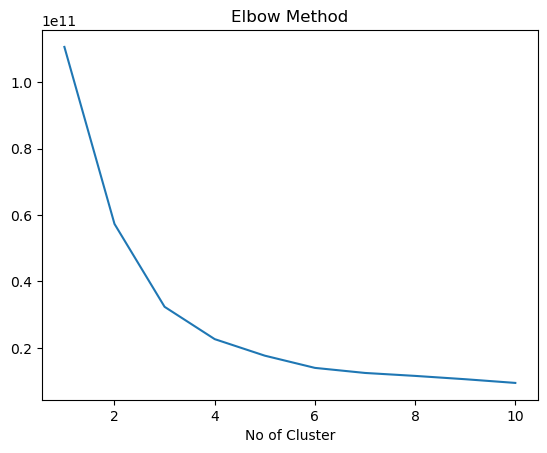

In [46]:
wcss=[] # the sum of square distance within cluster.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel

Selecting k=3 is appropriate as, in order to meet the requirements, we must build three clusters. The Elbow technique also demonstrates this.

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [48]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [49]:
y_kmeans = kmeans.fit_predict(df1)

y_kmeans

array([2, 2, 2, ..., 2, 0, 0])

In [50]:
print(kmeans.labels_)

[2 2 2 ... 2 0 0]


In [51]:
#starting the cluster numbering at 0 rather than 1.
y_kmeans1=y_kmeans+1

In [52]:
# The cluster is a new list.
cluster = list(y_kmeans1)
# A cluster is added to our dataset.
df['cluster'] = cluster

In [53]:
#Average across Clusters 1 through 3
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
cluster,,,,,,,,,,,,,,,,,,,,,
1,2006.5,30.3,24.8,3.2,17.6,0.0,17.6,22.7,5.3,4.4,...,1.4,2.6,0.9,0.1,0.2,0.4,8.2,22.0,0.5,27.1
2,2007.6,175.2,172.5,17.4,92.3,0.0,92.3,214.5,81.6,29.3,...,1.0,2.1,0.7,0.2,0.2,0.5,10.2,26.3,0.8,24.5
3,2006.9,85.5,78.6,10.1,52.5,0.0,52.5,83.7,22.3,12.7,...,1.8,4.2,1.1,0.1,0.2,0.6,11.8,27.1,1.1,40.3


The mean value for each cluster for each offense is shown in the clusters above.

In [109]:
df2='Total crimes against women'
df3='Total crimes against children'
df4='Total crimes against SCs'

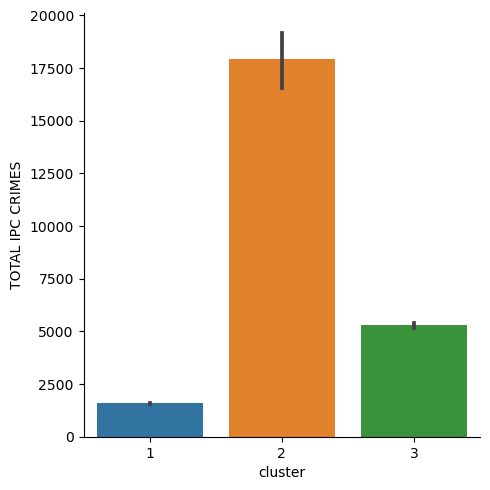

In [59]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df, kind='bar');
plt.savefig('clustercatplot.jpg')

We may name the clusters according to the requirements since, according to the above cat plot, Cluster 2 has the lowest TOTAL IPC CRIMES and Cluster 3 has the greatest IPC CRIMES.

# The distribution of the states is depicted in the scatter above, with obvious clusters based on Murders and ATTEMPT to Murder. Additionally, there is a significant association among states between the incidence of murder and murder attempts.

After dividing the data according to the cluster value, it will be analyzed and labelled as sensitive, moderate, or peaceful.

In [61]:
data1=df[df['cluster']==1]
data2=df[df['cluster']==2]
data3=df[df['cluster']==3]

District-by-district Grouping and Then Looking for the Maximum Values for Each Column

In [134]:
data2.shape

(119, 67)

# Observation

data2(cluster value 2) has 6106 rows with lowest maximum values as than data3 value it lesser values than data1(clustervalue 1) so making it a peaceful area


In [137]:
peacefularea=df[df['cluster']==2] 

In [140]:
group_state.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1,3,0,0,0,0,3,12,63,7


In [72]:
print(data3['DISTRICT'].head())

        DISTRICT       DISTRICT       DISTRICT       DISTRICT
0       ADILABAD       ADILABAD       ADILABAD       ADILABAD
1      ANANTAPUR      ANANTAPUR      ANANTAPUR      ANANTAPUR
2       CHITTOOR       CHITTOOR       CHITTOOR       CHITTOOR
4  EAST GODAVARI  EAST GODAVARI  EAST GODAVARI  EAST GODAVARI
6         GUNTUR         GUNTUR         GUNTUR         GUNTUR


# Observations

Data3 falls into the sensitive area because it contains fewer rows but the highest crime values. It is tiny because the total count is 140, but we can see that the maximum values for each column (crime) are the highest.
Creating a senstivearea dataframe (with cluster value 3) from data3.

In [74]:
sensitivearea=df[df['cluster']==3]

# 4.2 For every cluster, creating a DataFrame that displays data based on the areas.
datasets were created based on the cluster value and given the following names.

Cluster 3: Sensitive Area;
Cluster 1: Moderate Area;
Cluster 2: Peaceful Area
Making the Clusters Visible

In [82]:
kmeans.cluster_centers_

array([[-0.03559241, -0.38612626, -0.31965269, -0.2023483 , -0.33193451,
        -0.02194853, -0.33192109, -0.33481233, -0.25818368, -0.23289342,
        -0.12887544, -0.27064748, -0.28698809, -0.26565632, -0.24473616,
        -0.24833753, -0.27648015, -0.26220877, -0.2517659 , -0.16314088,
        -0.15507253, -0.30802959, -0.3263335 , -0.3136242 , -0.31158596,
        -0.39091282],
       [ 0.2848188 ,  3.00071289,  2.59974004,  1.22337655,  2.09343987,
         0.06781946,  2.09353678,  3.10333293,  3.3170794 ,  2.05005758,
         2.4710571 ,  4.84395393,  4.69151638,  5.71844987,  5.29528144,
         5.3241093 ,  2.01563856,  4.86211613,  5.27638591,  4.06273958,
         0.29725705,  3.09859706,  1.78208084,  2.28033225,  3.16213939,
         4.92868997],
       [ 0.08274028,  0.90230742,  0.74088298,  0.49123528,  0.80126823,
         0.05670002,  0.80122628,  0.75599499,  0.53431658,  0.53158394,
         0.22378105,  0.48814502,  0.5410432 ,  0.42839274,  0.3932275 ,
       

In [127]:
cluster = list(y_kmeans1)
# A cluster is added to our dataset.

In [128]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,1,3,0,0,0,0,3,12,63,7


In [162]:
## Defining the countplot function for each cluster   for STATE/UT, YEAR,DISTRICT clumns for each cluster
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()
col1 = ['STATE/UT', 'YEAR']

<Axes: xlabel='STATE/UT', ylabel='count'>

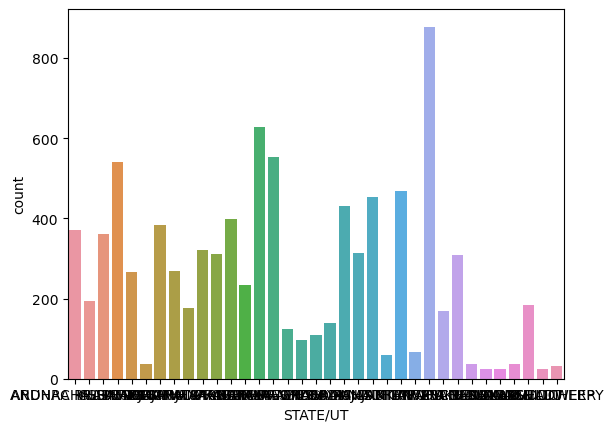

In [168]:
for i in sensitivearea[col1]:
    print("Countplot for {} column:->".format(i))
    generate_countplot(df[i])

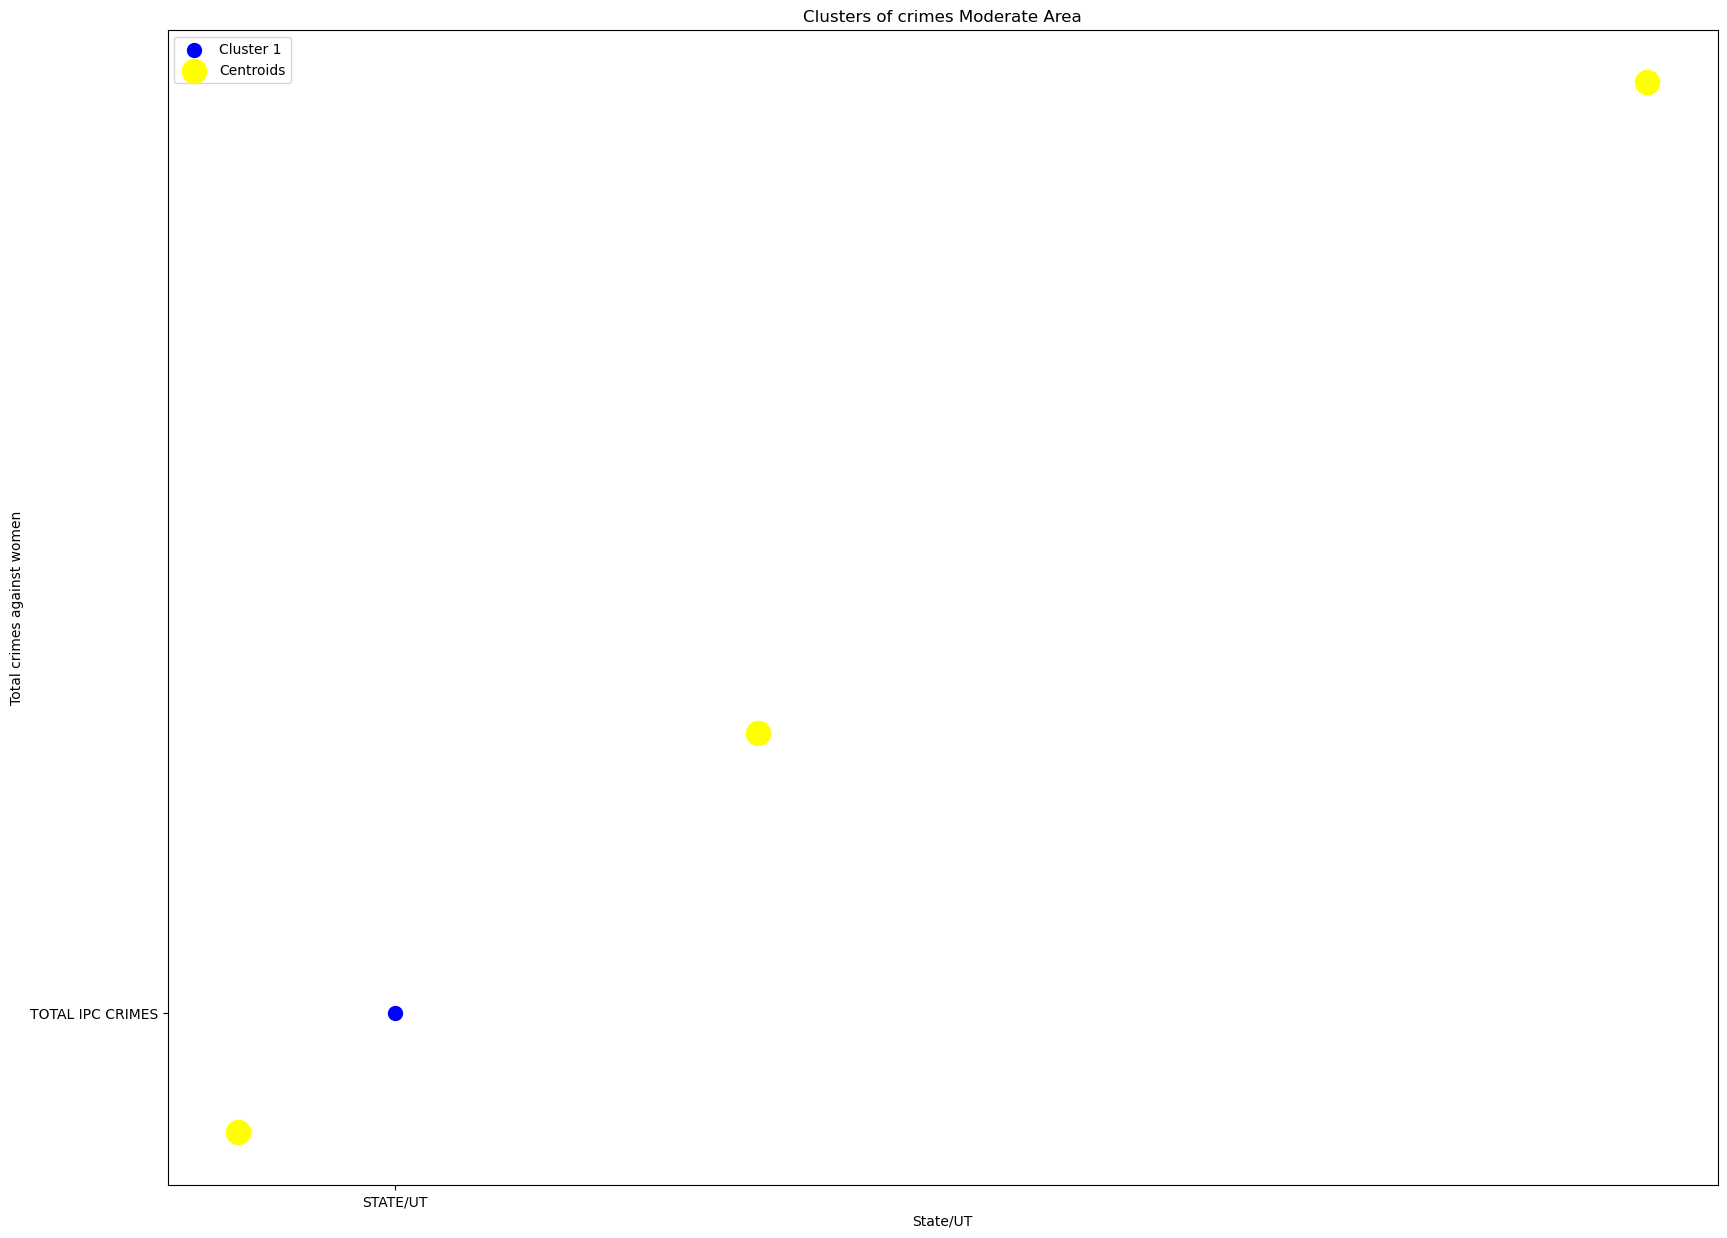

In [186]:
plt.figure(figsize=(20,15))
plt.scatter(x=['STATE/UT'], y=['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 1'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Moderate Area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

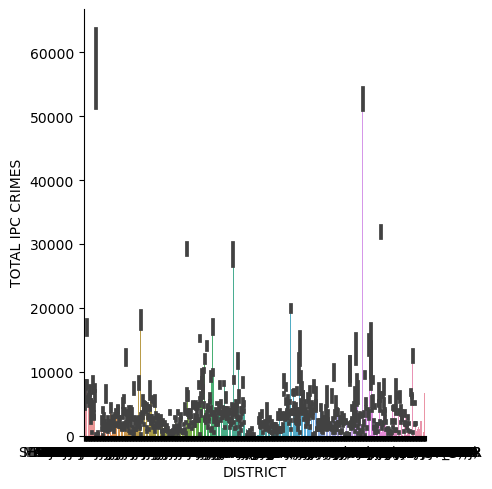

In [190]:
sns.catplot(x='DISTRICT', y='TOTAL IPC CRIMES', data=df1, kind='bar');
plt.savefig('clustercatplot.jpg')

# 4.3 Examining our clusters and writing a report outlining all of our findings.

# Sensitive Area Analysis

In [194]:
 pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#'Year' and 'State' features in a pivot table that illustrates a specific crime

ValueError: Grouper for 'STATE/UT' not 1-dimensional

In [195]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#'Year' and 'State' features in a pivot table that illustrates a specific crime

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [196]:
print("We have {} Rows and {} Columns in our dataframe Sensitive Area ".format(sensitivearea.shape[0], sensitivearea.shape[1]))

We have 2253 Rows and 67 Columns in our dataframe Sensitive Area 


In [201]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()
tot_crimes_against_women = sensitivearea['Overall crimes against women'].sum()
tot_crimes_against_STs = sensitivearea['Overall crimes against children'].sum()
tot_crimes_against_SCs = sensitivearea['Overall crimes against SCs'].sum()
tot_crimes_against_children = sensitivearea['Overall crimes against STs'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Overall crimes against women','Overall crimes against children','Overall crimes against SCs','Overall crimes against STs']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

In [202]:
import plotly.graph_objects as go
import plotly
import plotly.express as px

In [203]:
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

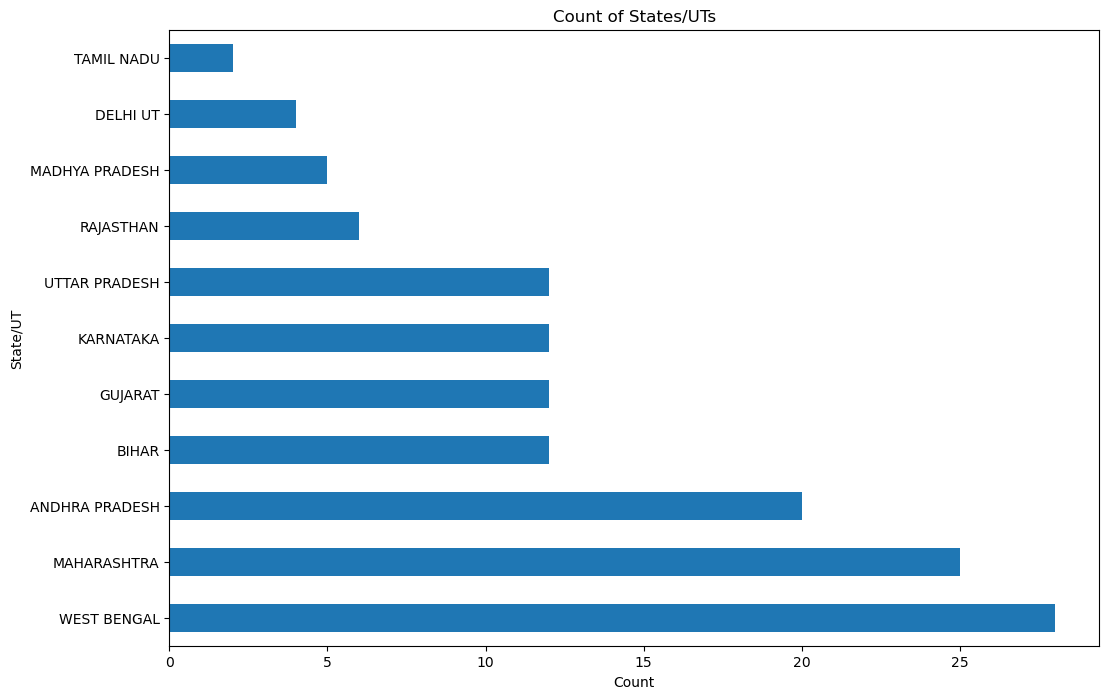

In [211]:
sensitivearea['STATE/UT'].value_counts()

# All States/UT
Eleven states have higher crime rates, with total IPC offenses, total crimes against women, and total crimes against STs and SCs being the most notable. Cause of the states' greater crime rates:

As West Bengal, Maharashtra, Andhra Pradesh, Rajasthan, and Uttar Pradesh are large states with significant population densities, these states have higher crime rates.

There should be fewer crimes and a greater literacy rate.

In [213]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [214]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [215]:
df3

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [217]:
sensiti.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9015.0,2006.629617,3.463242,2001.0,2004.0,2007.0,2010.0,2012.0
Murder,9004.0,3.782985,19.335030,0.0,0.0,1.0,3.0,528.0
Rape,9004.0,12.582297,57.724731,0.0,0.0,2.0,10.0,1632.0
Kidnapping and Abduction,9004.0,19.235451,118.681961,0.0,0.0,1.0,10.0,4239.0
Foeticide,9004.0,0.274545,1.753159,0.0,0.0,0.0,0.0,64.0
Abetment of suicide,9004.0,0.123834,1.004429,0.0,0.0,0.0,0.0,57.0
Exposure and abandonment,9004.0,2.108174,12.715876,0.0,0.0,0.0,0.0,321.0
Procuration of minor girls,9004.0,0.906042,8.053667,0.0,0.0,0.0,0.0,369.0
Buying of girls for prostitution,9004.0,0.075966,1.253676,0.0,0.0,0.0,0.0,48.0
Selling of girls for prostitution,9004.0,0.170813,2.565401,0.0,0.0,0.0,0.0,115.0


As indicated that the maximum values for each column will fall in a sensitive area when we observed the describe method for the entire dataset, as we can clearly see above.

# Bar Plotting State versus Total IPC Crime

In [ ]:
 #Assuming you have a DataFrame called 'df1'
df1.plot(kind='bar', figsize=(12, 8))

# Add a title and axis labels
plt.title('Bar Plot of DataFrame df1')
plt.xlabel('Column')
plt.ylabel('Value')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(18,7))
sns.heatmap(df.isnull())

Seaborn is used to construct the heatmap, which shows the correlation between the variables. The unique correlation between each feature and the other features in the dataset is displayed in the correlation matrix that was constructed.

When two variables have the following correlation:

0.0 to 0.3, their correlation is weak.
They have a moderate correlation (0.3–0.6).
0.6 to 0.9, indicating a strong correlation.
Ultimately, at >0.9, their correlation is extremely strong.

Positive and negative correlations show whether two variables are correlated directly or inversely; for example, a correlation of -0.7 between two variables means that, according to the preceding list, if one variable increases, the other one drops significantly.

It is evident from the heat map above that all crime categories, including murder, rape, and dowry deaths, have a positive correlation with the total number of IPC offenses.

Furthermore positively connected are kidnapping, abduction, and other rape/rape incidents.
There is a positive correlation between crime against SCs and crime against STs.